In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\Admin\Downloads\placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df = df.iloc[:,1:]

In [5]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [6]:
df.shape

(100, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [8]:
import matplotlib.pyplot as plt

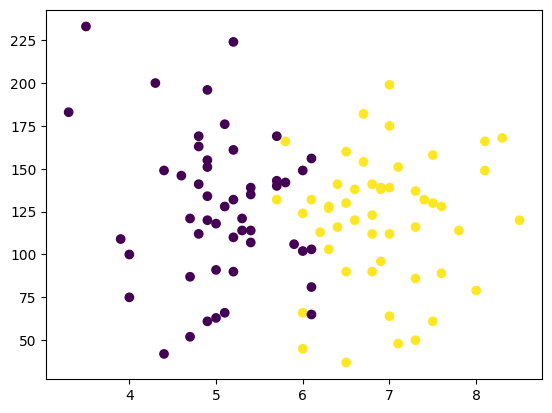

In [9]:
plt.scatter(df['cgpa'],df['iq'],c =df['placement'])

In [10]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]


In [11]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [12]:
Y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1)

In [15]:
X_train

,cgpa,iq
20,6.6,120.0
54,6.4,141.0
49,5.4,135.0
34,4.8,163.0
18,4.0,100.0
...,...,...
40,4.9,134.0
98,6.3,103.0
17,3.3,183.0
43,6.8,141.0


In [16]:
Y_train

20    1
54    1
49    0
34    0
18    0
     ..
40    0
98    1
17    0
43    1
63    1
Name: placement, Length: 90, dtype: int64

In [17]:
X_train

,cgpa,iq
20,6.6,120.0
54,6.4,141.0
49,5.4,135.0
34,4.8,163.0
18,4.0,100.0
...,...,...
40,4.9,134.0
98,6.3,103.0
17,3.3,183.0
43,6.8,141.0


In [18]:
X_test

,cgpa,iq
81,5.4,107.0
39,4.6,146.0
38,6.5,160.0
94,4.7,52.0
11,6.9,138.0
12,5.4,139.0
42,7.6,89.0
6,5.7,143.0
10,6.0,45.0
21,7.1,151.0


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
X_train = scaler.fit_transform(X_train)

In [22]:
X_train

array([[ 0.52688995, -0.10863466],
       [ 0.35382391,  0.42053933],
       [-0.5115063 ,  0.26934676],
       [-1.03070443,  0.97491208],
       [-1.7229686 , -0.61260989],
       [-1.7229686 , -1.24257892],
       [ 0.09422485, -1.09138635],
       [-0.16537422,  1.05050836],
       [ 0.00769182, -1.46936777],
       [ 1.30568715,  0.14335295],
       [-0.68457235, -0.8645975 ],
       [ 0.699956  , -0.03303838],
       [ 0.87302204,  1.27729722],
       [ 1.82488527,  1.05050836],
       [-0.85763839, -0.15903218],
       [ 0.00769182, -0.56221237],
       [ 0.09422485,  0.19375048],
       [-0.59803933, -0.25982723],
       [ 0.95955506, -1.92294548],
       [-1.37683652,  0.62212942],
       [ 2.17101736, -0.10863466],
       [ 0.699956  , -0.31022475],
       [-0.77110537, -1.46936777],
       [-1.03070443,  0.42053933],
       [ 0.09422485, -0.5370136 ],
       [ 0.44035693,  0.14335295],
       [ 0.52688995,  0.34494304],
       [-0.85763839, -0.83939874],
       [ 1.39222017,

In [23]:
X_test = scaler.transform(X_test)

In [24]:
X_test

array([[-0.5115063 , -0.43621856],
       [-1.20377048,  0.54653314],
       [ 0.44035693,  0.8993158 ],
       [-1.11723745, -1.82215043],
       [ 0.78648902,  0.34494304],
       [-0.5115063 ,  0.37014181],
       [ 1.39222017, -0.88979626],
       [-0.25190724,  0.47093685],
       [ 0.00769182, -1.99854176],
       [ 0.95955506,  0.67252694]])

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
clf = LogisticRegression()

In [27]:
# Model training
clf.fit(X_train,Y_train)

LogisticRegression()

In [28]:
y_pred = clf.predict(X_test)

In [29]:
Y_test

81    0
39    0
38    1
94    0
11    1
12    0
42    1
6     0
10    1
21    1
Name: placement, dtype: int64

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(Y_test,y_pred)

0.9

In [33]:
!pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/1c/07/512f6a780239ad6ce06ce2aa7b4067583f5ddcfc7703a964a082c706a070/mlxtend-0.23.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 640.0 kB/s eta 0:00:03
   - -------------------------------------- 0.1/1.4 MB 650.2 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.4 MB 762.6 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.4 MB 871.5 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.4 MB 926.0 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.4 MB 981.9 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.4 MB 1.0 MB/s eta 0:00:02
   --------- ------------------------------ 0.3/1.4 MB 1.0 MB/s eta 0:00:02
   ---------- ----------------------------- 0.4/1.4 MB 1.1 MB/s eta 0:00:01
   ----------- --------------------


[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

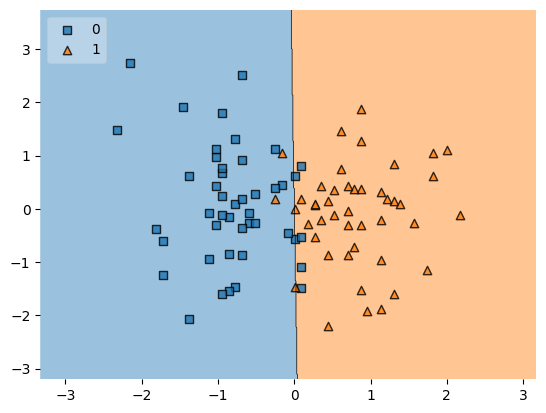

In [35]:
plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2)

In [36]:
import pickle

In [37]:
pickle.dump(clf,open('model.pkl','wb'))